# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



In [2]:
df = pd.read_csv("../cognizant_virtual_experience\data\sample_sales_data.csv")

In [3]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Basic data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [5]:
df.shape

(7829, 10)

In [6]:
df = df.drop(columns='Unnamed: 0')

<AxesSubplot:>

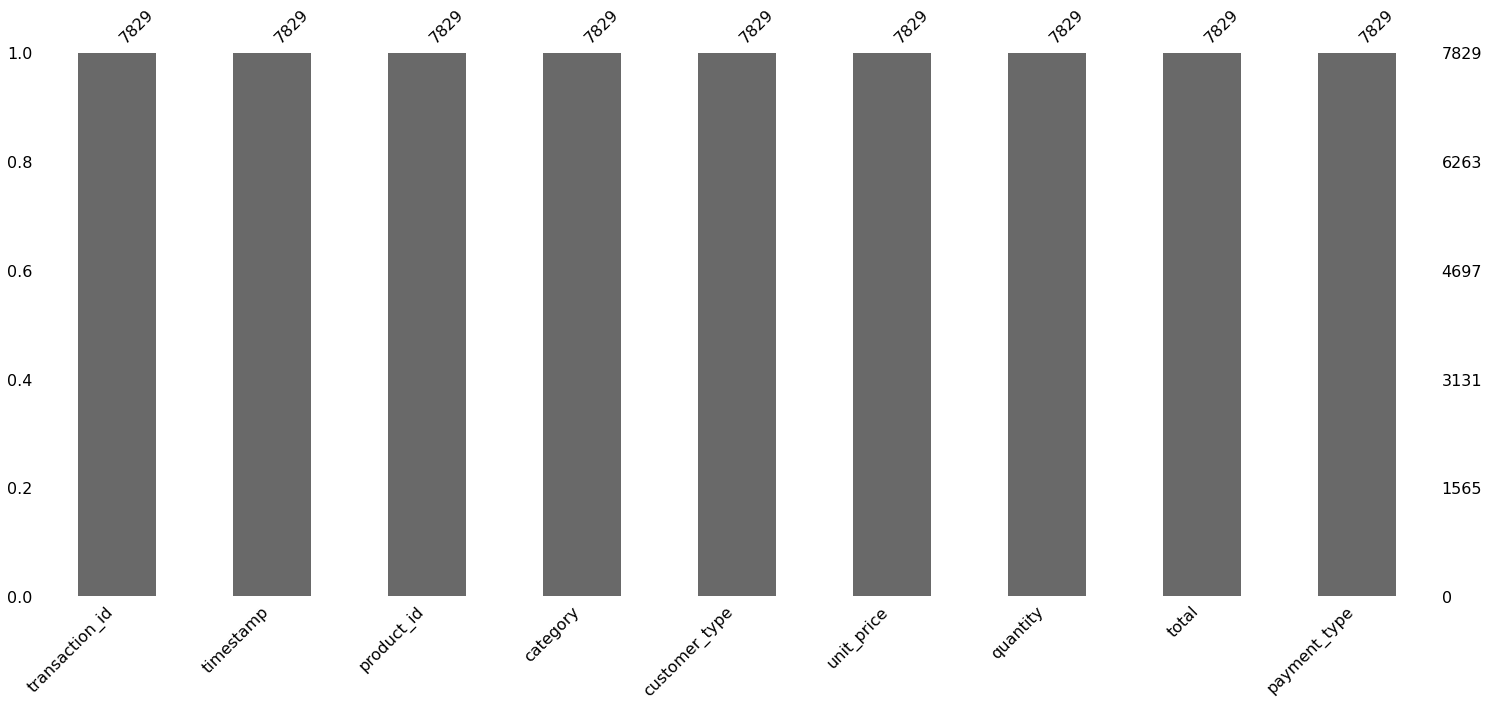

In [7]:
msno.bar(df)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,7829.0,7.819480,5.388088,0.19,3.99,7.19,11.19,23.99
quantity,7829.0,2.501597,1.122722,1.00,1.00,3.00,4.00,4.00
total,7829.0,19.709905,17.446680,0.19,6.57,14.97,28.47,95.96


- On average, the products cost $7, with the most expensive product priced at $23. However, the upper quartile of the prices is $11.19, indicating that the majority of products are priced relatively low.
- Customers tend to make small purchases, with a mean of 2 products and a maximum of 4.
- The total amount spent by customers is approximately $20, with the maximum being $95. This maximum value seems to be an outlier, as the upper quartile of total spending is $28.47.

In [10]:
df[['category','customer_type','payment_type']].describe(include='object').T

,count,unique,top,freq
category,7829,22,fruit,998
customer_type,7829,5,non-member,1601
payment_type,7829,4,cash,2027


- Fruit is the most commonly purchased item in the dataset, with the highest frequency compared to other products.
- The majority of customers are non-members, and prefer to pay with cash for their purchases.

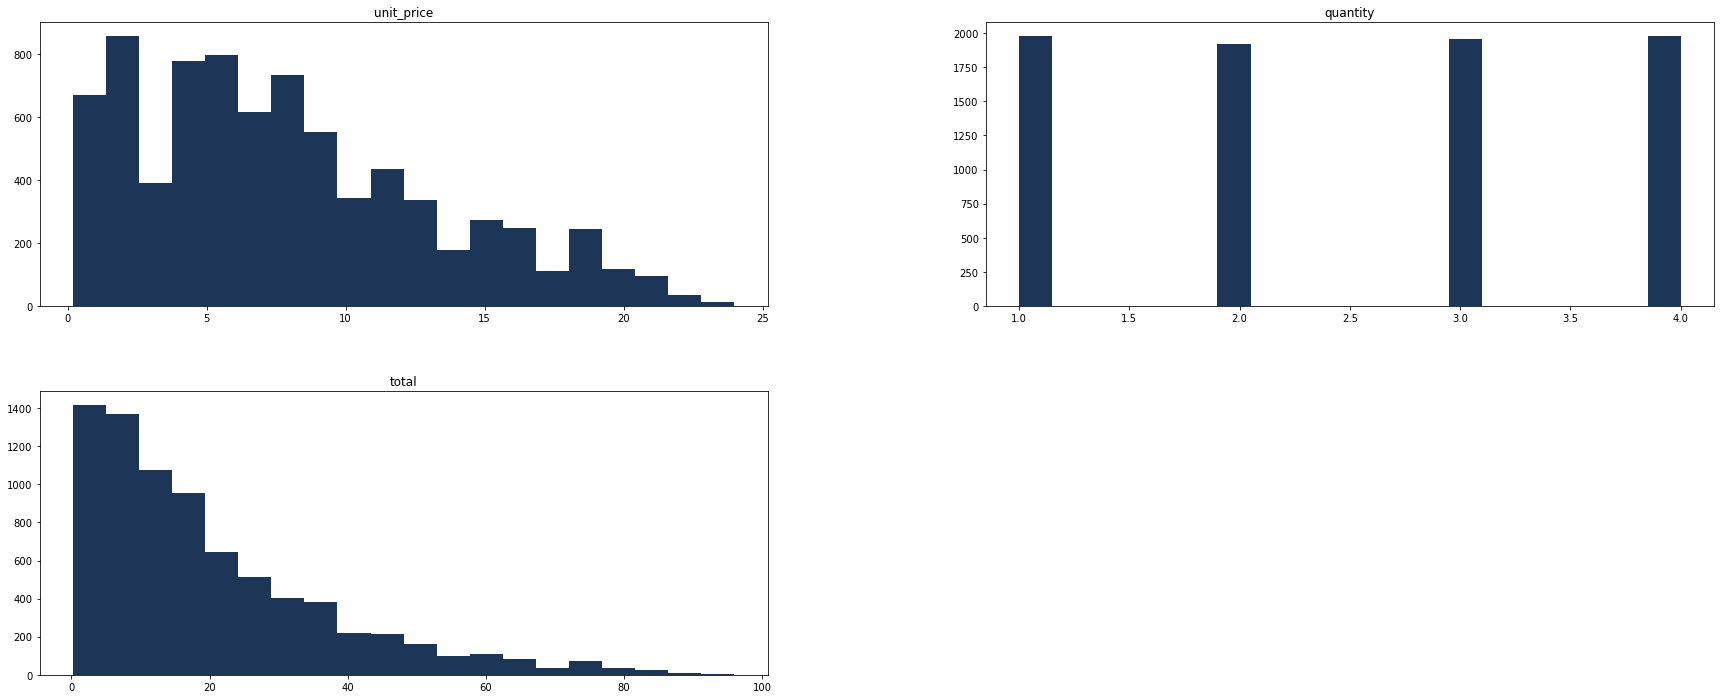

In [11]:
df.hist(bins=20, grid=False, figsize=(30,12), color = '#1D3557')
plt.show()

The distribution of the unit price and total amount purchased is left-skewed, indicating that the majority of the products sold are relatively inexpensive. This is expected for a grocery store, where customers typically purchase small quantities of items for daily use. It's also worth noting that the maximum quantity purchased is only 4, which suggests that customers are buying for personal use rather than for business or resale purposes.

<AxesSubplot:>

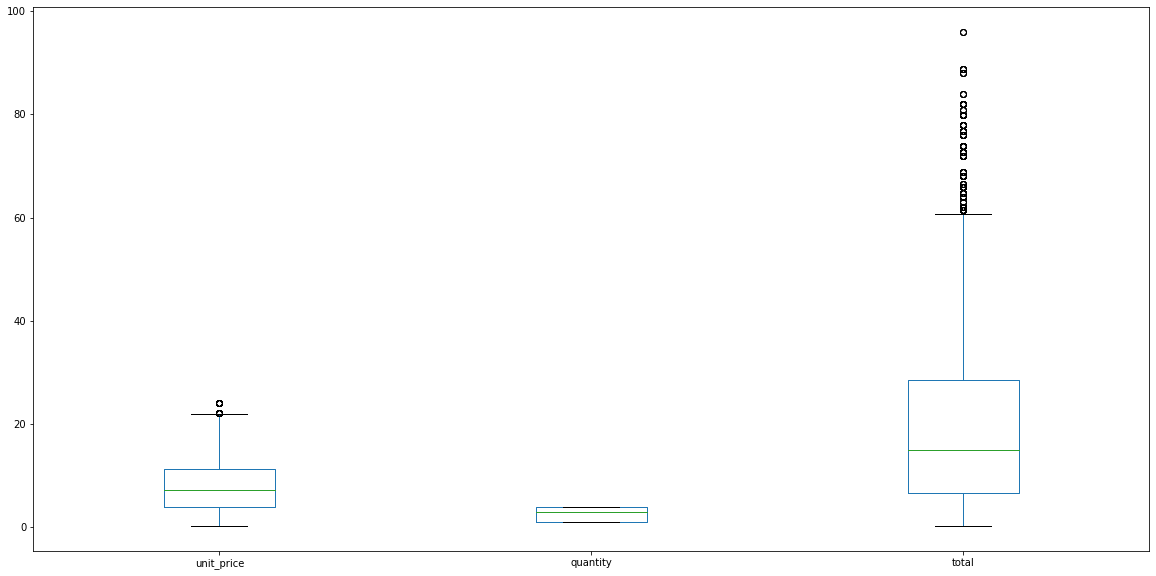

In [12]:
df.boxplot(column=['unit_price', 'quantity', 'total'], grid = False, figsize=(20,10))

In [14]:
def plot_categorical_distribution(data: pd.DataFrame, column: str, kind: str = 'bar',  rot: int = 0, title: str = ''):
    counts = data[column].value_counts().sort_values(ascending=True)
    ax = counts.plot(kind=kind, rot=rot, color = '#1D3557', xlabel ='', width = 0.8, figsize = (30, 10))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    plt.title(title, size=16, alpha=0.8, weight='bold')
    return ax

In [17]:
def annotate_barplot(ax, space=-25):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va,
            color='white',
            size=18,
            weight='bold')

In [26]:
df['product_id'].value_counts()

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64

By the `product_id` column we can see that are 300 unique products IDs, hence 300 unique products within the dataset. The product most frequently was sold within this dataset was `ecac012c-1dec-41d4-9ebd-56fb7166f6d9`, sold 114 times during the week. Whereas the product least sold was `ec0bb9b5-45e3-4de8-963d-e92aa91a201e` sold just 3 times

<AxesSubplot:title={'center':'Distribution of Category'}>

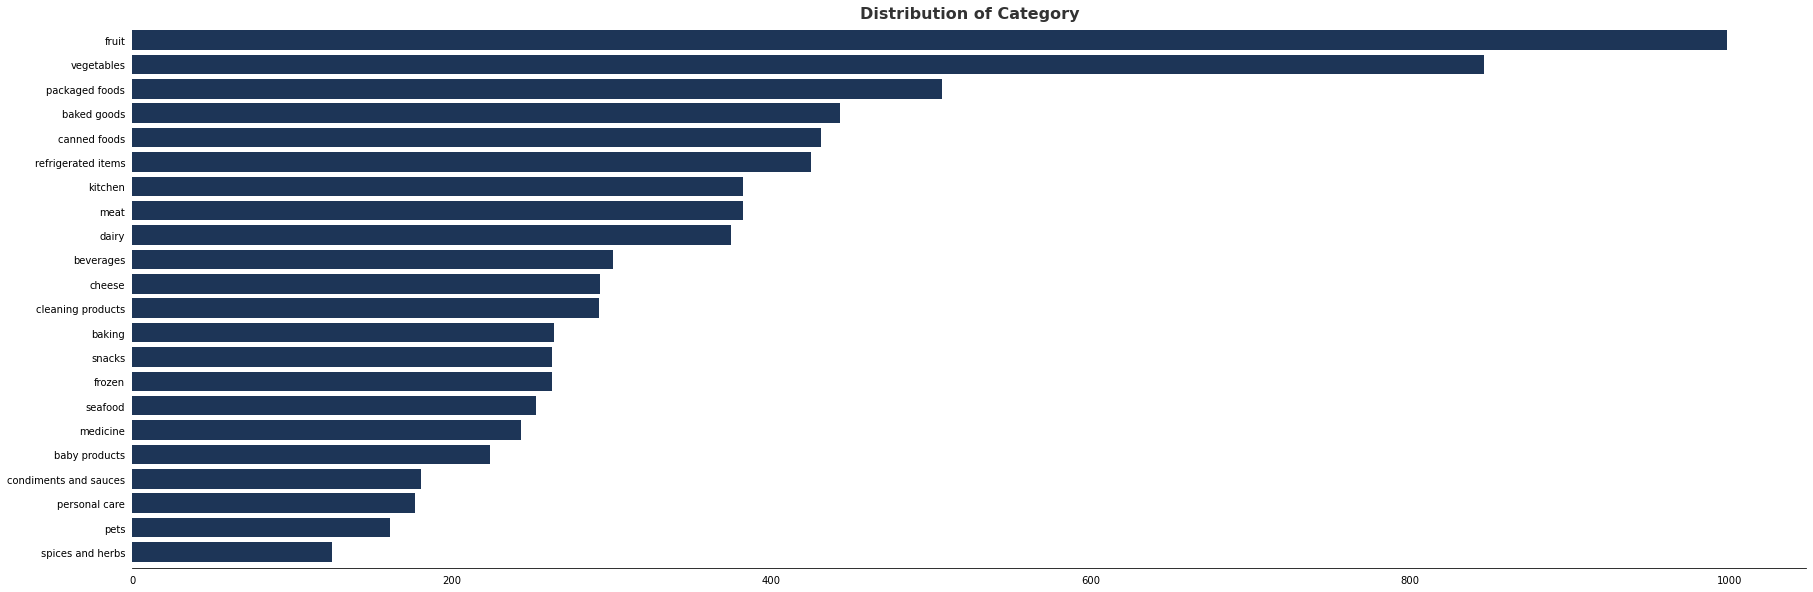

In [15]:
plot_categorical_distribution(df, 'category', kind = 'barh',title= 'Distribution of Category')

In [25]:
print(df['category'].value_counts())
print(f' Category has',len(df['category'].value_counts()), f'unique values')

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64
 Category has 22 unique values


The data shows that fruits are the most popular product among customers, with a total of 998 items sold throughout the week, followed closely by vegetables with 846 items sold. Packaged foods were the third most popular product category, with 507 items sold, while spices and herbs had the lowest sales with only 125 items sold.

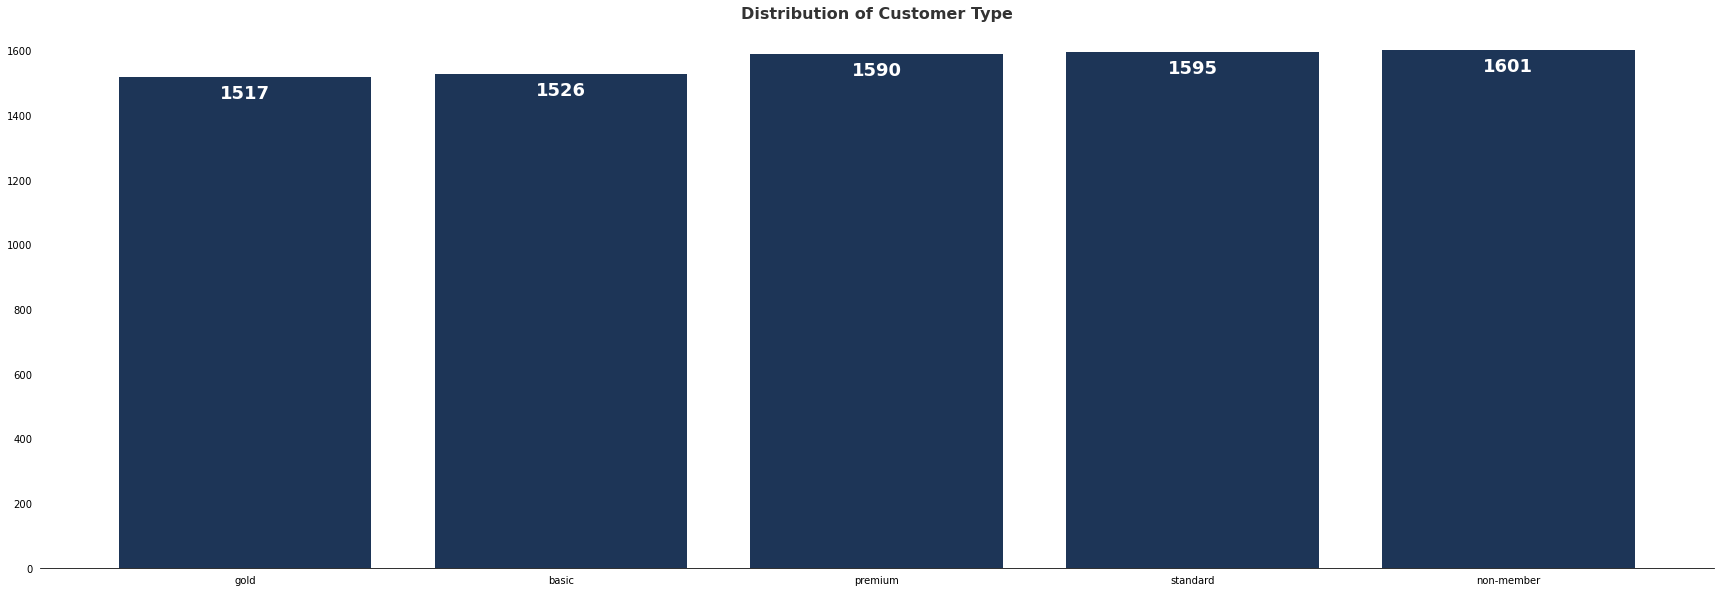

In [18]:
customer_type_p = plot_categorical_distribution(df, 'customer_type', title='Distribution of Customer Type')
annotate_barplot(customer_type_p)

Regarding customer type, the dataset shows a fairly balanced distribution, with non-members being slightly more frequent than other types of customers.

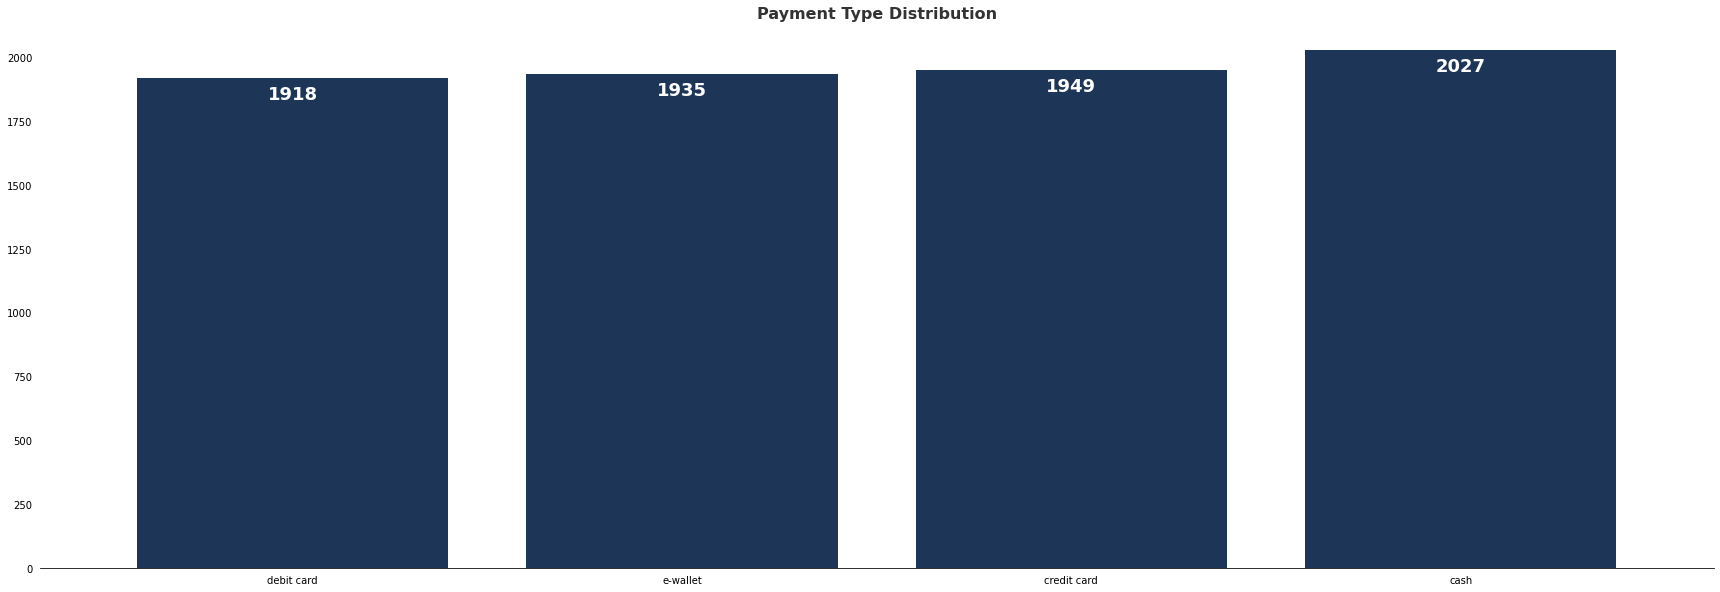

In [20]:
payment_type_p = plot_categorical_distribution(df, 'payment_type', title= 'Payment Type Distribution')
annotate_barplot(payment_type_p )

The Payment Type Distribution is fairly balanced among categories, with cash being the most preferred payment method (2027 transactions). Credit card is the second most used payment methods, while Debit card is the least preferred. This payment behavior is consistent with the low-cost nature of grocery shopping, where customers tend to purchase small quantities of goods at lower prices. The distribution of total amounts spent per transaction shows that at least 50% of the sample bought goods with a total value of $14 or less, which supports the preference for cash transactions.

In [22]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [38]:
df.head(10)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14
5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,17
6,4997b1ae-f5aa-4b9f-8fc8-22ad8f19837c,2022-03-07 19:36:57,14736243-d346-438f-9535-d80fcb9f3882,fruit,standard,1.49,4,5.96,e-wallet,19
7,bfffee68-0736-42af-bd3e-4ca77541b0d6,2022-03-07 19:03:20,0ddc2379-adba-4fb0-aa97-19fcafc738a1,fruit,basic,3.99,4,15.96,credit card,19
8,ce50e984-90cd-4b47-8537-3a4e32e6d314,2022-03-07 11:34:32,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,non-member,3.99,1,3.99,credit card,11
9,f0700cc9-e6f5-4b9a-add4-05e64b4f495b,2022-03-07 09:20:12,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,3,1.47,e-wallet,9


In [29]:
df['hour'] = df['timestamp'].dt.hour

In [46]:
df['hour'].value_counts()

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64

Text(0.5, 1.0, 'Total itens by hour')

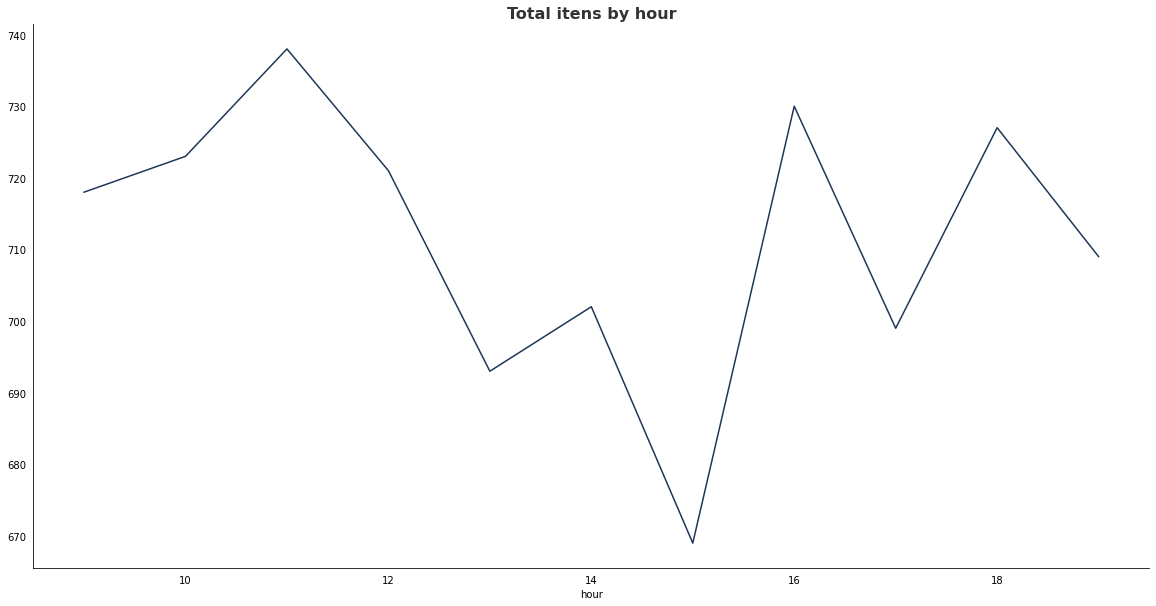

In [57]:
df_hourly_total = df.groupby('hour')['quantity'].count()
df_hourly_total.plot(kind='line', figsize=(20, 10), color='#1D3557')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(bottom=False, left=False)
plt.title('Total itens by hour', size=16, alpha=0.8, weight='bold')

The busiest times of day during the week are midday at 11 AM and in the late afternoon at 4 PM and 6 PM. This suggests that customers are more likely to purchase items before lunch or when they are leaving work for the day.

<AxesSubplot:>

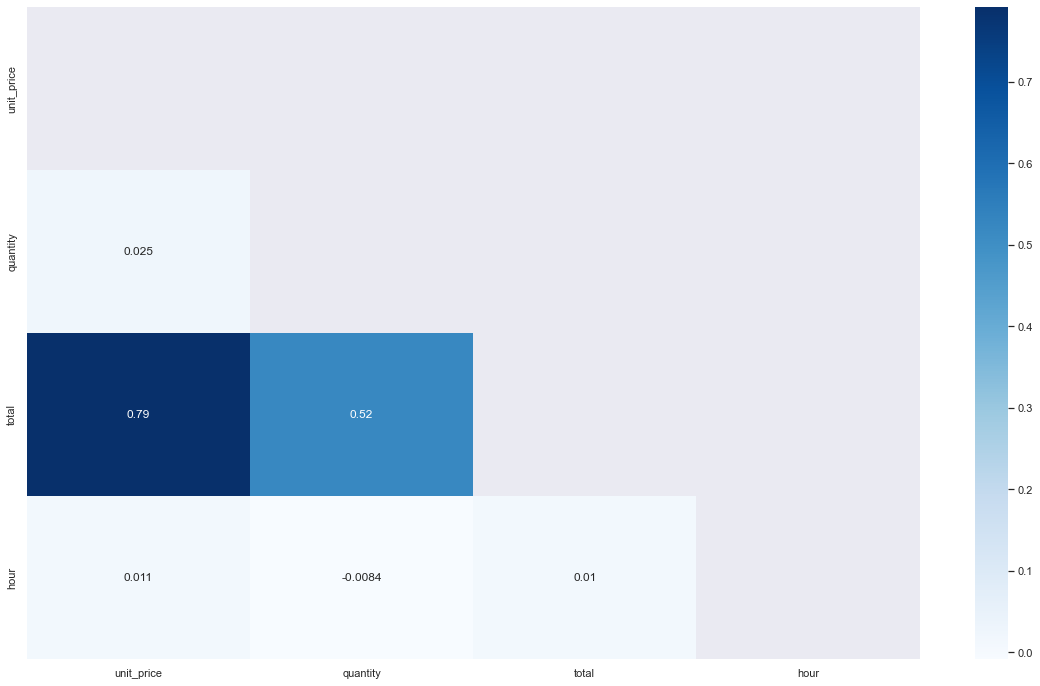

In [59]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(20, 12)})
sns.heatmap(df.corr(), mask=mask,  annot=True, cmap='Blues')

Regarding correlation between variables, we observed a high correlation between total and unit price, as well as quantity and unit price. This is understandable since total is a function of both columns. However, there is no significant correlation between the other numerical variables.

It is important to note that the sample size is small, which may lead to biased results and limit the ability to derive valuable insights about customer behavior. Therefore, it would be beneficial to have more data and features about additional stores.

Furthermore, the problem statement is quite broad, and it would be helpful to narrow down the focus and define specific questions to be answered in order to provide a more valuable end product.